In [7]:
#dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import csv

In [8]:
#load assesment file

SBUX = "resources/HistoricalData_SBUX.csv"
SBUX_df = pd.read_csv(SBUX)
SBUX_df.head()


,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$112.52,5436295,$111.798,$113.03,$111.52
1,05/21/2021,$110.92,5146620,$111.63,$112.22,$110.57
2,05/20/2021,$111.41,5345545,$109.98,$111.69,$109.87
3,05/19/2021,$109.67,5997454,$109.6,$109.94,$108.88
4,05/18/2021,$111.07,5177382,$111.37,$112.21,$111.01


In [ ]:
SBUX_df['Date']= pd.to_datetime(SBUX_df['Date'])
SBUX_df['Close/Last'] = SBUX_df['Close/Last'].str.replace('$','')
SBUX_df['Open'] = SBUX_df['Open'].str.replace('$','')
SBUX_df['High'] = SBUX_df['High'].str.replace('$','')
SBUX_df['Low'] = SBUX_df['Low'].str.replace('$','')
SBUX_df = SBUX_df.apply( pd.to_numeric)

In [11]:
SBUX_df['Date']= pd.to_datetime(SBUX_df['Date'])
SBUX_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,112.52,5436295,111.798,113.03,111.52
1,2021-05-21,110.92,5146620,111.630,112.22,110.57
2,2021-05-20,111.41,5345545,109.980,111.69,109.87
3,2021-05-19,109.67,5997454,109.600,109.94,108.88
4,2021-05-18,111.07,5177382,111.370,112.21,111.01


In [12]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = SBUX_df["Date"] >= start_date
before_end_date = SBUX_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
SBUX_df_4 = SBUX_df.loc[between_two_dates]
SBUX_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,77.62,7653305,77.90,78.050,76.52
253,2020-05-21,78.05,10312640,78.60,79.375,77.89
254,2020-05-20,77.76,7790481,77.23,77.840,76.52
255,2020-05-19,75.86,6484878,76.40,77.225,75.76
256,2020-05-18,76.23,8912473,76.86,77.500,76.20


In [13]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = SBUX_df["Date"] >= start_date
before_end_date = SBUX_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
SBUX_df_ls = SBUX_df.loc[between_two_dates]
SBUX_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,112.52,5436295,111.798,113.03,111.52
1,2021-05-21,110.92,5146620,111.630,112.22,110.57
2,2021-05-20,111.41,5345545,109.980,111.69,109.87
3,2021-05-19,109.67,5997454,109.600,109.94,108.88
4,2021-05-18,111.07,5177382,111.370,112.21,111.01


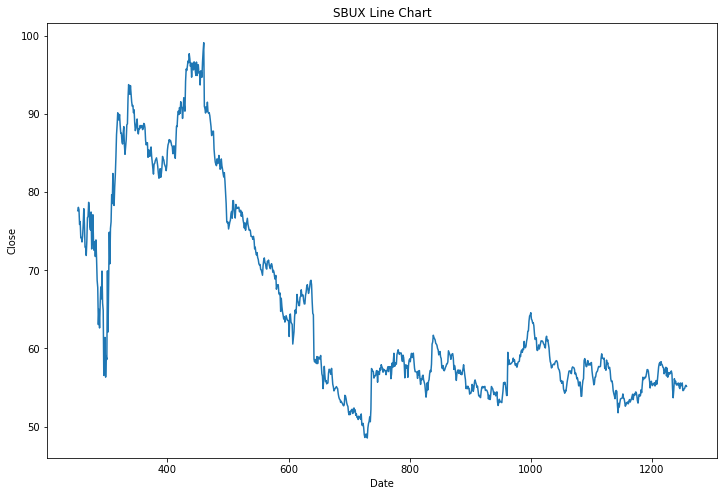

In [16]:
#Plot of the first four years
plt.figure(figsize=(12,8))
plt.plot(SBUX_df_4['Close/Last'])
plt.title("SBUX Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

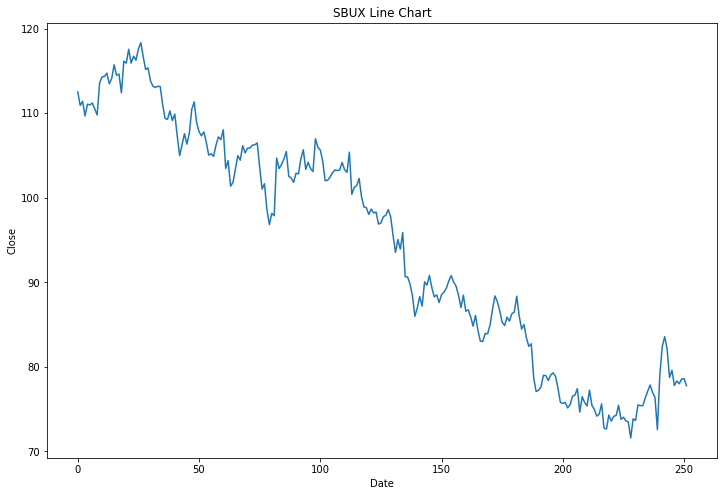

In [17]:
#Second Plot of Last Year 
plt.figure(figsize=(12,8))
plt.plot(SBUX_df_ls['Close/Last'])
plt.title("SBUX Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [20]:
#SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DataFrame
SBUX_df_4.shape

(1006, 6)

In [21]:
X = np.array(SBUX_df_4['Open']).reshape(1006,-1)
Y = np.array(SBUX_df_4['Close/Last']).reshape(1006,-1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X, Y)

LinearRegression()

In [25]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.29206959]
coefficient count: 1


In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.9961578307152368


In [27]:
# Predicting the price
lr.predict(X)

array([[77.86133869],
       [78.55836679],
       [77.19418324],
       ...,
       [55.41703413],
       [55.60622747],
       [55.25771342]])

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

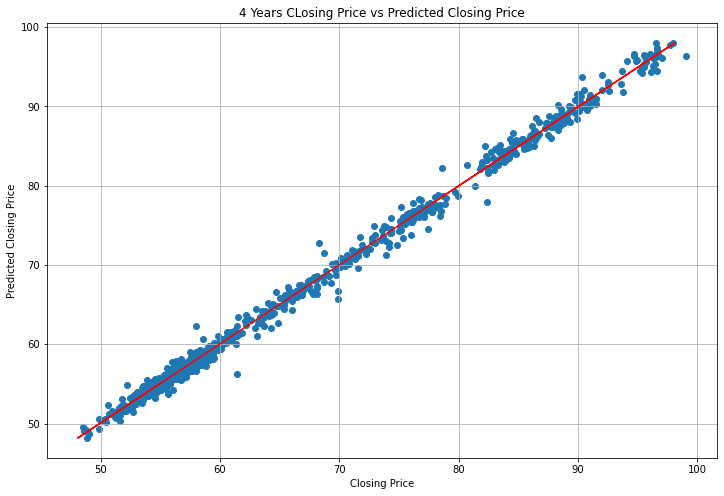

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(SBUX_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/SBUX_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

In [31]:
#TRAINING, TESTING ML ON 2ND DF
SBUX_df_ls.shape

(252, 6)

In [32]:
X_ls = np.array(SBUX_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(SBUX_df_ls['Close/Last']).reshape(252,-1)

In [33]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [34]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.08613913]
coefficient count: 1


In [35]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9926578351589651


In [36]:
# Predicting the price
lr.predict(X_ls)

array([[111.84546052],
       [111.67751864],
       [110.02808949],
       [109.64822096],
       [111.4176086 ],
       [111.26766049],
       [111.05773314],
       [110.20802722],
       [111.91743561],
       [113.36693396],
       [114.6165015 ],
       [115.15631467],
       [113.69681979],
       [114.25662604],
       [115.19630083],
       [115.22629045],
       [114.0466987 ],
       [113.25697201],
       [113.48689244],
       [115.71612093],
       [116.99567809],
       [116.06599984],
       [116.91370646],
       [116.13597562],
       [117.00567463],
       [118.21525601],
       [117.8653771 ],
       [115.14631813],
       [115.26627662],
       [113.82677481],
       [113.06703775],
       [112.9570758 ],
       [113.69681979],
       [112.9570758 ],
       [111.42760514],
       [109.95811371],
       [110.10806181],
       [110.3779684 ],
       [108.4686292 ],
       [109.05842508],
       [107.29903399],
       [105.05680999],
       [106.67924849],
       [107

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

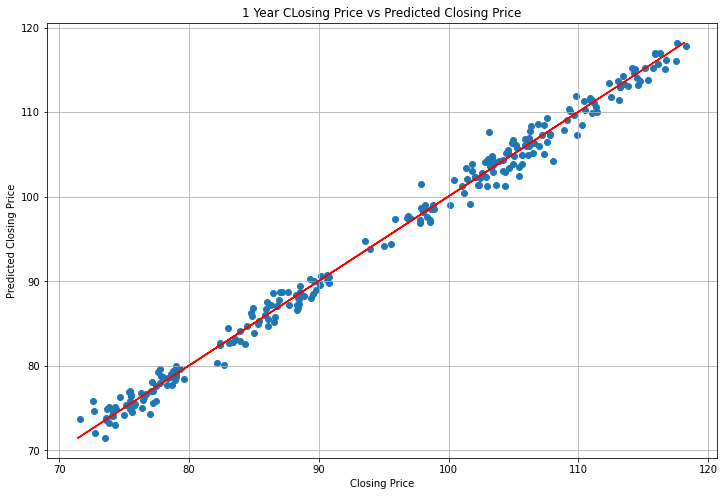

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(SBUX_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/SBUX_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')